In [1]:
import pandas as pd
import numpy as np

def get_stats(filepath, plot_loss=False):
    df = pd.read_table(filepath, names=[0]).copy()
    
    df_loss = df.copy().loc[df[0].str.contains('Avg Loss/batch')]
    df_loss['Epoch'] = df_loss[0].str.extract('Epoch: \((\d+)/\d\)').astype(int)
    df_loss['Batch'] = df_loss[0].str.extract('Batch: \((\d+)/\d+\)').astype(int)
    df_loss['Avg Time/batch'] = df_loss[0].str.extract('Avg Time/batch: ([0-9]*[.]?[0-9]+)').astype(float)
    df_loss['Avg Loss/batch'] = df_loss[0].str.extract('Avg Loss/batch: ([0-9]*[.]?[0-9]+)').astype(float)
    
    valid_acc = df.copy().loc[df[0].str.contains('Validation accuracy')]
    valid_acc['valid_acc'] = valid_acc[0].str.extract('Validation accuracy is ([0-9]*[.]?[0-9]+)').astype(float)
    
    return {'loss': df_loss, 'valid_acc': valid_acc}

## Baseline model

<AxesSubplot:>

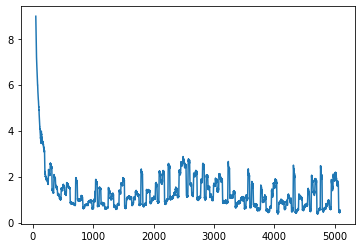

In [2]:
stats_baseline = get_stats(r'./xvector__20210606T222411_train.log')
stats_baseline['loss']['Avg Loss/batch'].plot()

<AxesSubplot:>

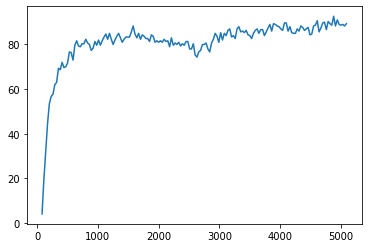

In [3]:
stats_baseline['valid_acc']['valid_acc'].plot()

## AM Softmax

<AxesSubplot:>

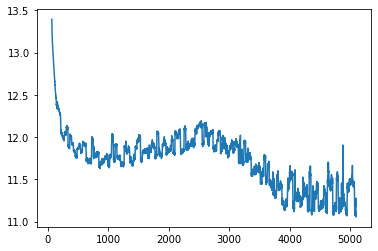

In [4]:
stats_mha = get_stats(r'./xvector-ams__20210618T080251/train.log')
stats_mha['loss']['Avg Loss/batch'].plot()

<AxesSubplot:>

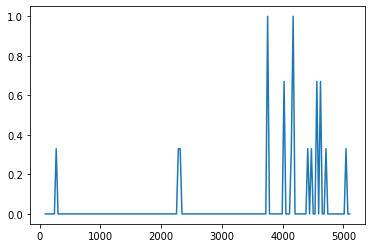

In [5]:
stats_mha['valid_acc']['valid_acc'].plot()

## MHA (5 heads)

<AxesSubplot:>

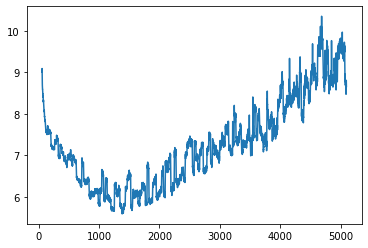

In [5]:
stats_mha = get_stats(r'./xvector-mha__20210604T095533_train.log')
stats_mha['loss']['Avg Loss/batch'].plot()

<AxesSubplot:>

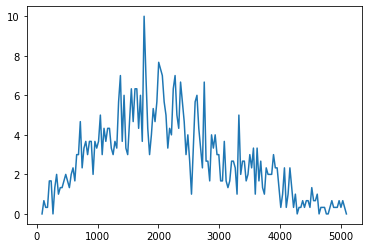

In [6]:
stats_mha['valid_acc']['valid_acc'].plot()

## MHA (Pytorch) (1 Head)

<AxesSubplot:>

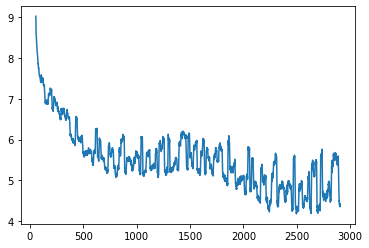

In [7]:
stats = get_stats(r'./xvector-mha__20210608T092323_train.log')
stats['loss']['Avg Loss/batch'].plot()

<AxesSubplot:>

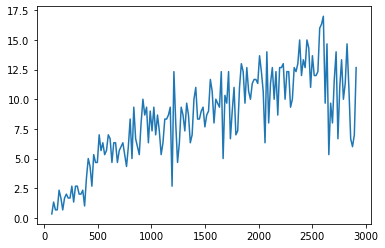

In [8]:
stats['valid_acc']['valid_acc'].plot()